# Bank Marketing Campaign Financial Financial Analysis

## 1. Introduction
**Objetive:** This project analyzes a bank's marketing campaign data to understand client characteristics, test business hyphoteses, and build predictive models for suscription and balance.
**Dataset:** The dataset contains information from a direct marketing campaign of a portuguese banking institution. The main goal was to predict if a client would subscribe to a term deposit.

**Key Questions:**
- What are the central tendencies and distributions of key numerical features?.
- Is there a significant difference in call duration between clients with and without a housing loan?.
- Does account balance vary significantly across different job types?.
- Is there an association between marital status and having a personal loan?.
- Can we predict if a client will subscribe to a term deposit?.
- Can we predict a client's account balance?.

## 2. Data Loading and Initial Exploration
### 2.1 Import Libraries and Load Data

In [2]:
# Basic Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind, f_oneway, chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,ConfusionMatrixDisplay,mean_squared_error, r2_score

In [3]:
# load dataset
dataset = os.path.join('dataset','bank.csv')
df = pd.read_csv(dataset)

### 2.2 Initial data inspection

In [4]:
# Checking the dataset
print(df.head())

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


In [5]:
# Checking about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None


In [6]:
# descriptive measures
print(df.describe())

                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  


### Initial Observations
* The dataset contains 11,162 records and 17 columns.
* There are no missing values.
* Features include client demographics, campaign details and economics indicators.

## 3. Descriptive analysis
### 3.1 Measures of central Tendency and Dispersion

In [7]:
# central trend measures (mean, median, mode)
columns = ['age','balance','duration']
age_mean, balance_mean, duration_mean = df[columns].mean()
age_median, balance_median, duration_median = df[columns].median()
age_mode, balance_mode, duration_mode= df[columns].mode().iloc[0]

print(f"Age: [Mean: {age_mean:.4f}, Median: {age_median:.4f}, Mode: {age_mode:.4f}]")
print(f"balance: [Mean: {balance_mean:.4f}, Median: {balance_median:.4f}, Mode: {balance_mode:.4f}]")
print(f"Duration: [Mean: {duration_mean:.4f}, Median: {duration_median:.4f}, Mode: {duration_mode:.4f}]")

Age: [Mean: 41.2319, Median: 39.0000, Mode: 31.0000]
balance: [Mean: 1528.5385, Median: 550.0000, Mode: 0.0000]
Duration: [Mean: 371.9938, Median: 255.0000, Mode: 97.0000]


In [8]:
# dispersion measures (range, variance, standar deviation, CV, q1, q2)
age_range, balance_range, duration_range = df[columns].max() - df[columns].min()
age_variance, balance_variance, duration_variance = df[columns].var()
age_stddev, balance_stddev, duration_stddev = df[columns].std()
age_cv = age_stddev / age_mean
balance_cv = balance_stddev / balance_mean
duration_cv = duration_stddev / duration_mean
age_q1, balance_q1, duration_q1 = df[columns].quantile(0.25)
age_q3, balance_q3, duration_q3 = df[columns].quantile(0.75)

print(f"Age: [Range: {age_range:.4f}, Variance: {age_variance:.4f}, Standard deviation: {age_stddev:.4f}, CV: {age_cv:.4f}, Q1: {age_q1:.4f}, Q3: {age_q3:.4f}]")
print(f"Balance: [Range: {balance_range:.4f}, Variance: {balance_variance:.4f}, Standard deviation: {balance_stddev:.4f}, CV: {balance_cv:.4f}, Q1: {balance_q1:.4f}, Q3: {balance_q3:.4f}]")
print(f"Duration: [Range: {duration_range:.4f}, Variance: {duration_variance:.4f}, Standard deviation: {duration_stddev:.4f}, CV: {duration_cv:.4f}, Q1: {duration_q1:.4f}, Q3: {duration_q3:.4f}]")

Age: [Range: 77.0000, Variance: 141.9284, Standard deviation: 11.9134, CV: 0.2889, Q1: 32.0000, Q3: 49.0000]
Balance: [Range: 88051.0000, Variance: 10403291.1232, Standard deviation: 3225.4133, CV: 2.1101, Q1: 122.0000, Q3: 1708.0000]
Duration: [Range: 3879.0000, Variance: 120498.1162, Standard deviation: 347.1284, CV: 0.9332, Q1: 138.0000, Q3: 496.0000]


### 3.2 Outliers Detection Using IQR and Standard Deviation Method

In [9]:
# Outliers detection
## IQR method
### age
age_IQR = age_q3 - age_q1
age_top_limit = age_q3 + 1.5*age_IQR
age_bot_limit = age_q1 - 1.5*age_IQR
age_outliers_IQR = df[(df['age']<age_bot_limit)|(df['age']>age_top_limit)]
### balance
balance_IQR = balance_q3 - balance_q1
balance_top_limit = balance_q3 + 1.5*balance_IQR
balance_bot_limit = balance_q1 - 1.5*balance_IQR
balance_outliers_IQR = df[(df['balance']<balance_bot_limit)|(df['balance']>balance_top_limit)]
### duration
duration_IQR = duration_q3 - duration_q1
duration_top_limit = duration_q3 + 1.5*duration_IQR
duration_bot_limit = duration_q1 - 1.5*duration_IQR
duration_outliers_IQR = df[(df['duration']<duration_bot_limit)|(df['duration']>duration_top_limit)]
## Standar deviation method
age_outliers_std = df[(df['age']< age_mean-3*age_stddev)|(df['age']>age_mean+3*age_stddev)]
balance_outliers_std = df[(df['balance']<balance_mean-3*balance_stddev)|(df['balance']>balance_mean+3*balance_stddev)]
duration_outliers_std = df[(df['duration']<duration_mean-3*duration_stddev)|(df['duration']>duration_mean+3*duration_stddev)]

### 3.3 Data Visualization
#### Histograms

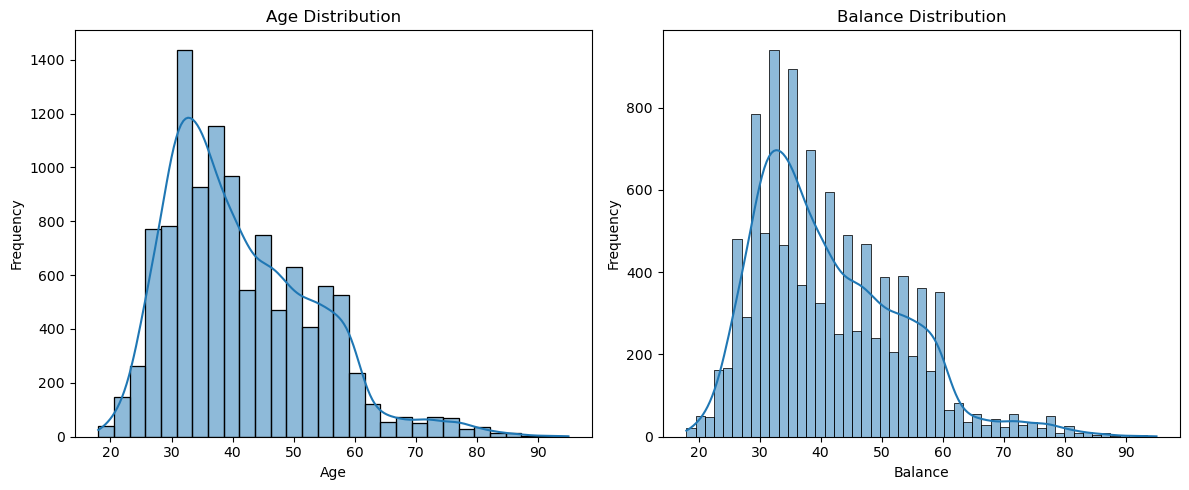

In [10]:
# Visualization
## Histograms
%matplotlib inline
plt.figure(figsize=(12,5))
### Age
plt.subplot(1,2,1)
sns.histplot(data=df, x='age',kde=True, bins=30)
plt.title("Age Distribution")
plt.xlabel('Age')
plt.ylabel('Frequency')
### Balance
plt.subplot(1,2,2)
sns.histplot(data=df,x='age',kde=True)
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Boxplots

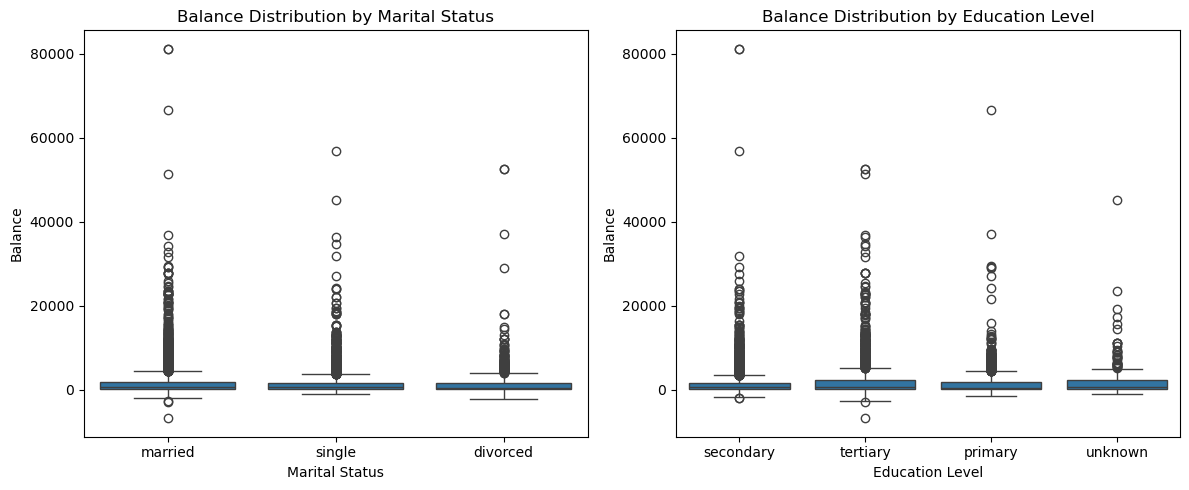

In [11]:
# Boxplot
plt.figure(figsize=(12,5))
## balance by marital
plt.subplot(1,2,1)
sns.boxplot(data=df,x='marital',y='balance')
plt.title('Balance Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Balance')
## balance by education
plt.subplot(1,2,2)
sns.boxplot(data=df,x='education',y='balance')
plt.title('Balance Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Balance')

plt.tight_layout()
plt.show()

#### Scatterplot

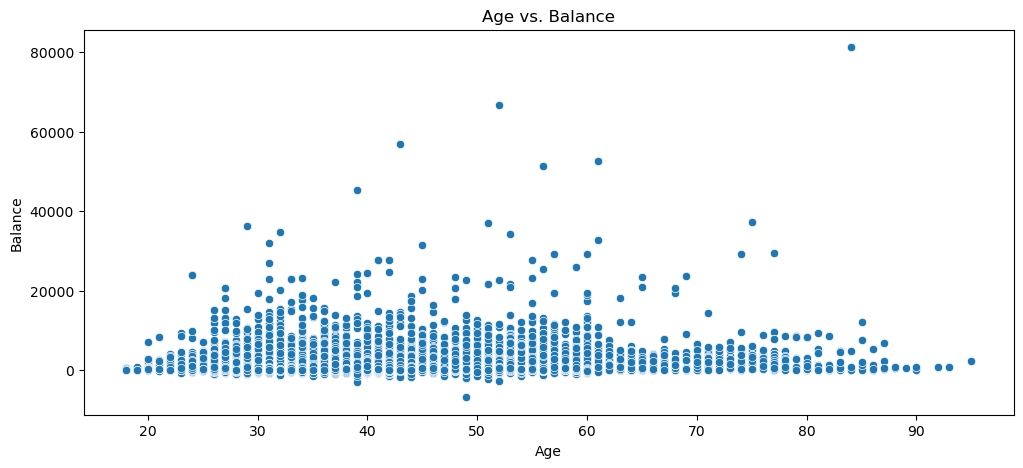

In [12]:
# Scatterplot
plt.figure(figsize=(12,5))
sns.scatterplot(data=df,x='age',y='balance')
plt.title('Age vs. Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

### Key Findings:
- a
- b
- c

## 4. Hypothesis Testing
1. Average call duration by housing loan
   * H₀: There is no difference in the average call duration.
2. Average account balance across different job categories
   * H₀: The average balance is equal across all job types
3. relationship between marital status and whether they have a personal loan
   * H₀: Marital status and having a personal loan are independent.

### 4.1: T-Test: Call Duration by Housing Loan

In [13]:
# Hypothesis 1: Average call duration by loan
## test: t-test
### split the duration in loan
duration_loan_yes = df[df['housing']=='yes']['duration']
duration_loan_no = df[df['housing']=='no']['duration']
### perform the independent t-test
t_stat, p_value_ttest = ttest_ind(duration_loan_yes,duration_loan_no,nan_policy='omit')
### results
print(f"Hypothesis 1: Average call duration by loan\n T-statistic: {t_stat:.4f}\n P-value: {p_value_ttest:.4f}\n")
### Interpret the results
if p_value_ttest < 0.05:
    print("Conclusion: We REJECT the null hypothesis. There is a significant difference in call duration between clients with and without a housing loan.")
else:
    print("Conclusion: We FAIL TO REJECT the null hypothesis. There is no significant evidence of a difference in call duration.")


Hypothesis 1: Average call duration by loan
 T-statistic: 3.7051
 P-value: 0.0002

Conclusion: We REJECT the null hypothesis. There is a significant difference in call duration between clients with and without a housing loan.


### 4.2 ANOVA: Balance by Job Type

In [14]:
# Hypothesis 2: Average account balance across different job categories
# test: ANOVA
## split the balance for each job
jobs = {}
for job_type in df['job'].unique():
    jobs[job_type] = df[df['job']==job_type]['balance'].dropna()
## perform the one-way ANOVA test
f_stat,p_value_ANOVA=f_oneway(*jobs.values())
## results
print(f"Hypothesis 2: Average account balance across different job categories\n F-statistic: {f_stat:.4f}\n P_value: {p_value_ANOVA:.4f}\n")
## interpret the results
if p_value_ANOVA < 0.05:
    print("Conclusion: We REJECT the null hypothesis. There is a significant difference in average balance between at least one job type.")
else:
    print("Conclusion: We FAIL TO REJECT the null hypothesis. There is no significant evidence of a difference between job types.")

Hypothesis 2: Average account balance across different job categories
 F-statistic: 12.5343
 P_value: 0.0000

Conclusion: We REJECT the null hypothesis. There is a significant difference in average balance between at least one job type.


### 4.3 Chi-Square Test: Personal Loan by Marital Status

In [15]:
# Hypothesis 3: relationship between marital status and whether they have a personal loan
# test: chi-squared
## create a contingency table
contingency_table = pd.crosstab(df['marital'],df['loan'])
print("Contingency Table:")
print(contingency_table)
## perform chi-squared test
chi2, p_value_chi, dof, expected = chi2_contingency(contingency_table)
## Results
print("\nHypothesis 3: Personal Loan by Marital Status")
print(f"Chi2 statistic: {chi2:.4f}")
print(f"P-value: {p_value_chi:.4f}")
print(f"Degrees of freedom: {dof}\n")
## interpret results
if p_value_chi < 0.05:
    print("Conclusion: We REJECT the null hypothesis. Having a personal loan is DEPENDENT on marital status.")
else:
    print("Conclusion: We FAIL TO REJECT the null hypothesis. There is no significant evidence of an association.")

Contingency Table:
loan        no  yes
marital            
divorced  1092  201
married   5438  913
single    3172  346

Hypothesis 3: Personal Loan by Marital Status
Chi2 statistic: 48.8704
P-value: 0.0000
Degrees of freedom: 2

Conclusion: We REJECT the null hypothesis. Having a personal loan is DEPENDENT on marital status.


## 5. Predictive Model
### 5.1 Classification: Predicting Term Deposit Subscription
#### Data Preprocessing

In [16]:
# Classification -> predict if the client will suscribe (yes/no)
## --- Pre-processing ---
## Separate the Target from the Features
y = df['deposit']
X = df.drop('deposit',axis=1)
## Encode Categorical variables
categorical_columns = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)
## Encode Target
label_encoded = LabelEncoder()
y_encoded = label_encoded.fit_transform(y)
## Normalize/Scale Numerical features
scaler = StandardScaler()
numerical_colums = X.select_dtypes(include=['int64']).columns
X_encoded[numerical_colums] = scaler.fit_transform(X_encoded[numerical_colums])
## --- Train-validate split ---
## Split the data (80% - 20%)
X_train,X_test,y_train,y_test = train_test_split(X_encoded,y_encoded, test_size=0.2,random_state=42,stratify=y_encoded) # random_state=42 ensures we get the same split every time, for reproducibility. stratify=y ensures the distribution of 'yes'/'no' is the same in both sets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Proportion of 'yes' in training set: {y_train.mean():.2f}")
print(f"Proportion of 'yes' in test set: {y_test.mean():.2f}")
    

Training set size: 8929 samples
Test set size: 2233 samples
Proportion of 'yes' in training set: 0.47
Proportion of 'yes' in test set: 0.47


#### Model Training and Evaluation

In [17]:
## --- Model Training and validation ---
## Initialize the models
log_reg = LogisticRegression(random_state=42, max_iter=1000)
dec_tree = DecisionTreeClassifier(random_state=42)
## dictionary to store models
models = {'Logistic_Regression':log_reg,'Decision_Tree':dec_tree}
## train and evaluate each model
for name, model in models.items():
    print(f"---{name}---")
    # Train model with on the trainin data
    model.fit(X_train,y_train)
    # Make predictions on the training set
    y_train_pred = model.predict(X_train)
    # Make predictions on the testing set
    y_test_pred = model.predict(X_test)
    # Calculate metrics for model
    train_accuracy = accuracy_score(y_train,y_train_pred)
    test_accuracy = accuracy_score(y_test,y_test_pred)
    train_f1 = f1_score(y_train,y_train_pred)
    test_f1 = f1_score(y_test,y_test_pred)
    # print results
    print(f"Training Accuracy: {train_accuracy:.4f} | Test Accuracy: {test_accuracy:.4f}")
    print(f"Training F1-Score: {train_f1:.4f} | Test F1-Score: {test_f1:.4f}")
    print(f"\nLogistic Regression - Confusion Matrix")
    print(confusion_matrix)

---Logistic_Regression---
Training Accuracy: 0.8264 | Test Accuracy: 0.8249
Training F1-Score: 0.8131 | Test F1-Score: 0.8117

Logistic Regression - Confusion Matrix
<function confusion_matrix at 0x000002774B791620>
---Decision_Tree---
Training Accuracy: 1.0000 | Test Accuracy: 0.7936
Training F1-Score: 1.0000 | Test F1-Score: 0.7800

Logistic Regression - Confusion Matrix
<function confusion_matrix at 0x000002774B791620>


#### Visualization

<Figure size 800x600 with 0 Axes>

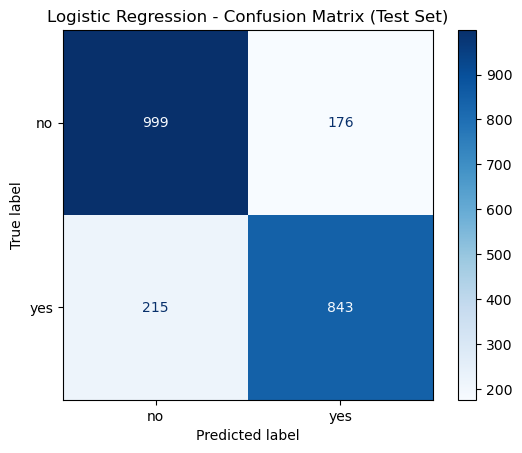

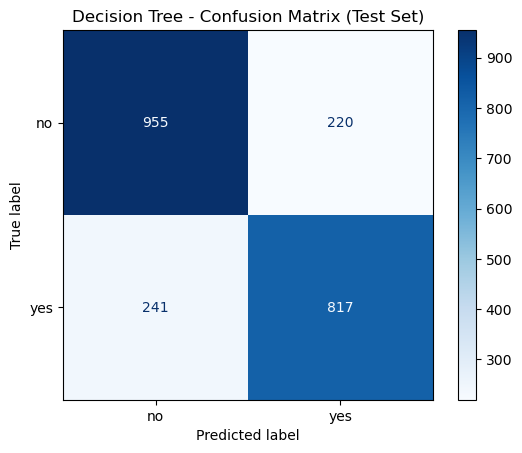

In [18]:
## Visualization
# Plot the confusion matrix for the Logistic Regression's TEST predictions
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, log_reg.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoded.classes_)
disp.plot(cmap='Blues', values_format='d') # 'd' format shows integers
plt.title("Logistic Regression - Confusion Matrix (Test Set)")
plt.grid(False) # Removes the grid for a cleaner look
plt.show()
# Plot the confusion matrix for the Decision Tree's TEST predictions
cm = confusion_matrix(y_test, dec_tree.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoded.classes_)
disp.plot(cmap='Blues')
plt.title("Decision Tree - Confusion Matrix (Test Set)")
plt.show()

### 5.2 Regression: Predicting Account Balance
#### Data Preprocessing

In [19]:
# Regression -> Predict the account balance
## Separate the target and Features
y_reg = df['balance']
X_reg = df.drop(['deposit','balance'],axis=1)
## Preprocessing
categorical_columns_reg = X.select_dtypes(include=['object']).columns
### One-Hot encoding
X_reg_encoded = pd.get_dummies(X_reg,columns=categorical_columns_reg, drop_first=True)

#### Model Training and Evaluation

In [20]:
## Train-test Split (80% - 20%)
X_train_reg,X_test_reg,y_train_reg,y_test_reg = train_test_split(X_reg_encoded,y_reg,test_size=0.2,random_state=42)
## Train the linear regression model
lin_reg_model = LinearRegression().fit(X_train_reg,y_train_reg)
## Make predictions
y_train_reg_pred = lin_reg_model.predict(X_train_reg)
y_test_reg_pred = lin_reg_model.predict(X_test_reg)
## Calculate Metrics
train_mse = mean_squared_error(y_train_reg,y_train_reg_pred)
test_mse = mean_squared_error(y_test_reg,y_test_reg_pred)
train_r2 = r2_score(y_train_reg,y_train_reg_pred)
test_r2 = r2_score(y_test_reg,y_test_reg_pred)
# Print the results
print("--- Linear Regression Model ---")
print("\nPerformance on Training Set:")
print(f"Mean Squared Error (MSE): {train_mse:.2f}")
print(f"R-squared (R²): {train_r2:.4f}")
print("\nPerformance on Test Set:")
print(f"Mean Squared Error (MSE): {test_mse:.2f}")
print(f"R-squared (R²): {test_r2:.4f}")

--- Linear Regression Model ---

Performance on Training Set:
Mean Squared Error (MSE): 9382220.33
R-squared (R²): 0.0454

Performance on Test Set:
Mean Squared Error (MSE): 12209670.56
R-squared (R²): 0.0385


#### Visualization

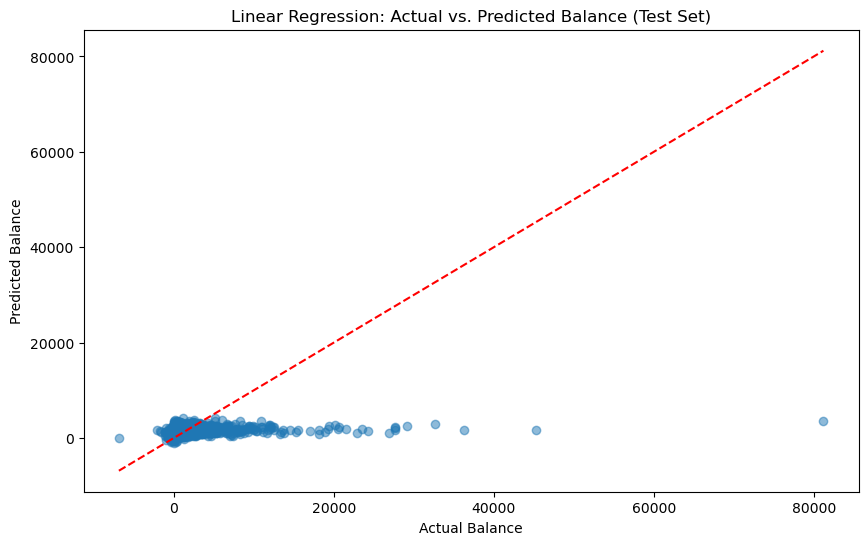

In [21]:
## Visualization
# Create a scatter plot of Actual vs. Predicted values for the TEST set
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_test_reg_pred, alpha=0.5)
plt.xlabel('Actual Balance')
plt.ylabel('Predicted Balance')
plt.title('Linear Regression: Actual vs. Predicted Balance (Test Set)')

# Plot a perfect prediction line (y=x)
max_val = max(y_test_reg.max(), y_test_reg_pred.max())
min_val = min(y_test_reg.min(), y_test_reg_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], 'r--') # Red dashed line

plt.show()

## 6. Final Conclusions

- The dataset provides valuable insights into client demographics, financial indicators, and campaign effectiveness.
- Statistical analysis revealed significant differences in call duration by housing loan status and account balance across job types, while marital status and personal loan showed some association.
- Predictive models for term deposit subscription achieved reasonable accuracy, with logistic regression and pruned decision tree models performing well and mitigating overfitting.
- Linear regression models for account balance benefited from log transformation, improving predictive performance and handling skewness.
- Overall, combining descriptive statistics, hypothesis testing, and machine learning enables a comprehensive understanding of the bank's marketing campaign and client behavior.

## Optional cells: fixing overfitting for models

In [22]:
"""
This code cell is to fix the overfitting to the tree decision

# Create a new, simplified Decision Tree to reduce overfitting
pruned_tree = DecisionTreeClassifier(random_state=42,
                                    max_depth=5,        # Limits how deep the tree can grow
                                    min_samples_leaf=10 # A leaf must have at least 10 samples
                                    )

# Train and evaluate the pruned tree
pruned_tree.fit(X_train, y_train)

y_train_pred_pruned = pruned_tree.predict(X_train)
y_test_pred_pruned = pruned_tree.predict(X_test)

# Calculate metrics
train_accuracy_pruned = accuracy_score(y_train, y_train_pred_pruned)
test_accuracy_pruned = accuracy_score(y_test, y_test_pred_pruned)

train_f1_pruned = f1_score(y_train, y_train_pred_pruned)
test_f1_pruned = f1_score(y_test, y_test_pred_pruned)

# Print the results
print("\n--- Pruned Decision Tree (max_depth=5, min_samples_leaf=10) ---")
print(f"Training Accuracy: {train_accuracy_pruned:.4f} | Test Accuracy: {test_accuracy_pruned:.4f}")
print(f"Training F1-Score: {train_f1_pruned:.4f} | Test F1-Score: {test_f1_pruned:.4f}")

# Compare with the original overfit tree
print("\n--- Original Overfit Decision Tree ---")
print(f"Training Accuracy: {train_accuracy} | Test Accuracy: {test_accuracy}")
print(f"Training F1-Score: {train_f1} | Test F1-Score: {test_f1}")

"""

'\nThis code cell is to fix the overfitting to the tree decision\n\n# Create a new, simplified Decision Tree to reduce overfitting\npruned_tree = DecisionTreeClassifier(random_state=42,\n                                    max_depth=5,        # Limits how deep the tree can grow\n                                    min_samples_leaf=10 # A leaf must have at least 10 samples\n                                    )\n\n# Train and evaluate the pruned tree\npruned_tree.fit(X_train, y_train)\n\ny_train_pred_pruned = pruned_tree.predict(X_train)\ny_test_pred_pruned = pruned_tree.predict(X_test)\n\n# Calculate metrics\ntrain_accuracy_pruned = accuracy_score(y_train, y_train_pred_pruned)\ntest_accuracy_pruned = accuracy_score(y_test, y_test_pred_pruned)\n\ntrain_f1_pruned = f1_score(y_train, y_train_pred_pruned)\ntest_f1_pruned = f1_score(y_test, y_test_pred_pruned)\n\n# Print the results\nprint("\n--- Pruned Decision Tree (max_depth=5, min_samples_leaf=10) ---")\nprint(f"Training Accuracy: {trai

In [23]:
"""
This code cell is a better version

# 1. Apply a log transformation to the target variable to handle skewness
# We use np.log1p which is log(1 + x) to handle zeros in the balance.
y_reg_log = np.log1p(df['balance']) # Transforming the target

# 2. Split the TRANSFORMED data
X_train_reg_log, X_test_reg_log, y_train_reg_log, y_test_reg_log = train_test_split(X_reg_encoded, y_reg_log, test_size=0.2, random_state=42)

# 3. Train a new model on the transformed data
lin_reg_model_log = LinearRegression()
lin_reg_model_log.fit(X_train_reg_log, y_train_reg_log)

# 4. Make predictions and transform them BACK to the original scale for interpretation
y_test_pred_reg_log = lin_reg_model_log.predict(X_test_reg_log)
y_test_pred_reg_original = np.expm1(y_test_pred_reg_log) # Reverse the log transformation

# 5. Calculate metrics on the original scale
test_mse_log = mean_squared_error(y_test_reg, y_test_pred_reg_original) # Compare to original y_test
test_r2_log = r2_score(y_test_reg, y_test_pred_reg_original)

print("\n--- Linear Regression Model (with Log-Transformed Target) ---")
print(f"Test Mean Squared Error (MSE) [original scale]: {test_mse_log:.2f}")
print(f"Test R-squared (R²) [original scale]: {test_r2_log:.4f}")

# Compare with the previous model
print("\n--- Comparison: Original Model vs. Model with Log Target ---")
print(f"Original Model Test R²: {test_r2:.4f}")
print(f"Log-Target Model Test R²: {test_r2_log:.4f}")
"""

'\nThis code cell is a better version\n\n# 1. Apply a log transformation to the target variable to handle skewness\n# We use np.log1p which is log(1 + x) to handle zeros in the balance.\ny_reg_log = np.log1p(df[\'balance\']) # Transforming the target\n\n# 2. Split the TRANSFORMED data\nX_train_reg_log, X_test_reg_log, y_train_reg_log, y_test_reg_log = train_test_split(X_reg_encoded, y_reg_log, test_size=0.2, random_state=42)\n\n# 3. Train a new model on the transformed data\nlin_reg_model_log = LinearRegression()\nlin_reg_model_log.fit(X_train_reg_log, y_train_reg_log)\n\n# 4. Make predictions and transform them BACK to the original scale for interpretation\ny_test_pred_reg_log = lin_reg_model_log.predict(X_test_reg_log)\ny_test_pred_reg_original = np.expm1(y_test_pred_reg_log) # Reverse the log transformation\n\n# 5. Calculate metrics on the original scale\ntest_mse_log = mean_squared_error(y_test_reg, y_test_pred_reg_original) # Compare to original y_test\ntest_r2_log = r2_score(y_te